In [21]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, mixture
import matplotlib.pyplot as plt
tags = np.loadtxt("tags_vector.dat")

In [22]:
vbgm = mixture.BayesianGaussianMixture(n_components=250, random_state=0)

In [23]:
vbgm = vbgm.fit(tags)

In [24]:
labels = vbgm.predict(tags)

In [25]:
label_num = len(set(labels))
label_num

250

<function matplotlib.pyplot.show(close=None, block=None)>

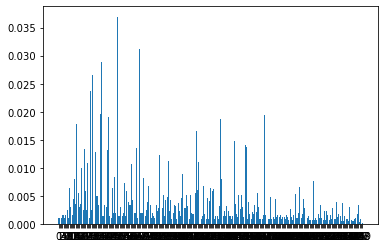

In [26]:
x_tick =np.array([x for x in range(label_num)])
plt.bar(x_tick, vbgm.weights_, tick_label=x_tick)
plt.show

In [27]:
df = pd.read_csv("2000tags.csv")
df2 = pd.DataFrame({
    "単語ベクトル": list(tags),
    "クラスタ番号": list(labels)
})
df3 = pd.concat([df.loc[:,["タグ","投稿数"]],df2], axis=1)

df3.set_index("タグ").to_csv("./2000tags_cluster.csv")

In [28]:
hashtags = [[] for i in range(label_num)]
for j in range(2000):
    hashtags[df3.loc[j]["クラスタ番号"]].append(df3.loc[j]["タグ"])

In [29]:
df3 = pd.DataFrame({
    "クラスタ番号": list(range(label_num)),
    "タグ": hashtags
})

df3.set_index("クラスタ番号").to_csv("./tags_per_cluster.csv")

In [30]:
with open("tags_per_cluster.dat","w") as f:
  for elem in hashtags:
    f.write(str(elem) + "\n")
f.close()